# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [23]:
weather_api_key

'58fce5fc8d8ffb74c67640cc1afa0cb0'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data=[]
record_count=1
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------------")

for i, city in enumerate(cities):
    if (i%50==0 and i >= 50):
        set_count+=1
        record_count = 0
   
  
    city_url = url+"&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count+=1
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_data.append({
            "City": city,
            "Cloudiness": city_weather["clouds"]["all"],
            "Country": city_weather["sys"]["country"],
            "Date": city_weather["dt"],
            "Humidity": city_weather["main"]["humidity"],
            "Lat": city_weather["coord"]["lat"],
            "Lng": city_weather["coord"]["lon"],
            "Max Temp": city_weather["main"]["temp_max"],
            "Wind Speed": city_weather["wind"]["speed"]                  
                         })
    except:
        print("City not found. Skipping...")
        pass
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kathmandu
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | okhotsk
Processing Record 8 of Set 1 | les escoumins
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | innisfail
Processing Record 11 of Set 1 | lyaskelya
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | cape coast
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | venado tuerto
Processing Record 20 of Set 1 | kindu
Processing Record 21 of Set 1 | flin flon
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | 

Processing Record 40 of Set 4 | deep river
Processing Record 41 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | kapaa
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | springbok
Processing Record 47 of Set 4 | jalu
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | viedma
Processing Record 0 of Set 5 | garissa
Processing Record 1 of Set 5 | zalesovo
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | kraainem
Processing Record 4 of Set 5 | santiago del estero
Processing Record 5 of Set 5 | ituni
City not found. Skipping...
Processing Record 6 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | omboue
Processing Record 9 of Set 5 | mezen
Processing Record 10 of Set 5 | tuktoyaktuk
Processing Record 11 of Set 5

Processing Record 31 of Set 8 | kupang
Processing Record 32 of Set 8 | nishihara
Processing Record 33 of Set 8 | fairview
Processing Record 34 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 35 of Set 8 | searcy
Processing Record 36 of Set 8 | bundaberg
Processing Record 37 of Set 8 | mitsamiouli
Processing Record 38 of Set 8 | kingseat
Processing Record 39 of Set 8 | constantine
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | dandong
Processing Record 42 of Set 8 | korla
Processing Record 43 of Set 8 | kang
Processing Record 44 of Set 8 | san antonio
Processing Record 45 of Set 8 | gamba
Processing Record 46 of Set 8 | boa vista
Processing Record 47 of Set 8 | dikson
Processing Record 48 of Set 8 | horsham
Processing Record 49 of Set 8 | solnechnyy
Processing Record 0 of Set 9 | esil
Processing Record 1 of Set 9 | hutchinson
Processing Record 2 of Set 9 | changde
Processing Record 3 of Set 9 | el alto
Processing Record 4 of Set 9 | fre

City not found. Skipping...
Processing Record 23 of Set 12 | turayf
Processing Record 24 of Set 12 | saryozek
Processing Record 25 of Set 12 | garden city
Processing Record 26 of Set 12 | simga
Processing Record 27 of Set 12 | itacoatiara
Processing Record 28 of Set 12 | vestmanna
Processing Record 29 of Set 12 | sept-iles
Processing Record 30 of Set 12 | shahreza
Processing Record 31 of Set 12 | shakiso
Processing Record 32 of Set 12 | wanning
Processing Record 33 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 34 of Set 12 | cap-chat
Processing Record 35 of Set 12 | gniezno
Processing Record 36 of Set 12 | taltal
Processing Record 37 of Set 12 | chicama
Processing Record 38 of Set 12 | zhigansk
Processing Record 39 of Set 12 | kalmunai
Processing Record 40 of Set 12 | norman wells
Processing Record 41 of Set 12 | wanlaweyn
Processing Record 42 of Set 12 | garowe
Processing Record 43 of Set 12 | shirvan
Processing Record 44 of Set 12 | wahran
City not found. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,40,CL,1579368191,48,-53.15,-70.92,60.80,31.09
1,clyde river,20,CA,1579368378,73,70.47,-68.59,-31.00,10.29
2,rikitea,27,PF,1579368378,80,-23.12,-134.97,78.15,13.94
3,kathmandu,20,NP,1579368328,87,27.72,85.32,46.40,4.70
4,narsaq,75,GL,1579368379,54,60.92,-46.05,28.40,46.08


In [6]:
city_data_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
lat = city_data_df.Lat
max_temp = city_data_df["Max Temp"]
humidity = city_data_df.Humidity
cloudiness = city_data_df.Cloudiness
wind = city_data_df["Wind Speed"]

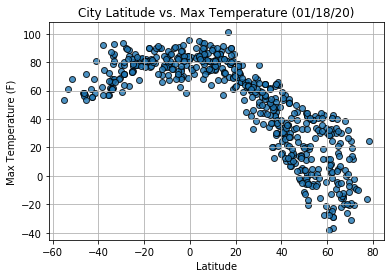

In [8]:
# import time 
# date = time.strftime("%m/%d/%Y")
plt.scatter(lat, max_temp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/Fig1.png")

plt.show()

There is a negative trend between latitude and max temperature. 

#### Latitude vs. Humidity Plot

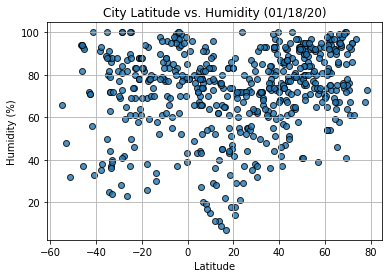

In [9]:
plt.scatter(lat, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")

plt.show()

Humidity and latitude do not have that much of a pattern, however the data points are more centalized toward the middle of the graph as well as the top of the graph. The majority of the data points are between 60 and 100 percent humidity.

#### Latitude vs. Cloudiness Plot

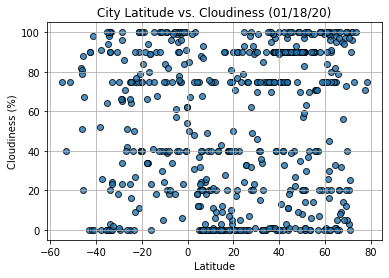

In [10]:
plt.scatter(lat, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")

plt.show()

There is no real pattern between cloudiness and latitude, the data points are very dispersed

#### Latitude vs. Wind Speed Plot

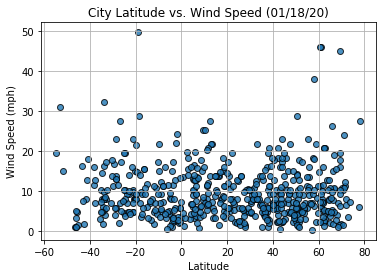

In [11]:
plt.scatter(lat, wind, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")

plt.show()

Windspeed is congregated between 10-20mph even with the changes in latitude

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        
        (slope, intercept, rvalue, p_value, std_err) = linregress(x_values, y_values)
        
        regress_values = x_values*slope+intercept
        line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values, regress_values, "r-")
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel("Latitude")
        plt.ylabel(y_label)
#         ERROR
        print(f"The r-squared is: {rvalue}")
        plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_hemis_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
south_hemis_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8715505789269442


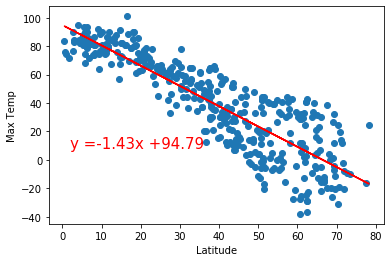

In [46]:
x_values = north_hemis_df["Lat"].astype("float")
y_values = north_hemis_df["Max Temp"].astype("float")
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature",\
                       "Max Temp", (2,8))

For every one unit increase in latitude, max temp will decrease by 1.43 degrees
There is a negative relationship between latitude and max temp in the northern hemisphere
The r squared value indicates that only 87% of the variation in max temp is explained by latitude, therefore latitude is a fairly strong predictor of max temp in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5211339042397956


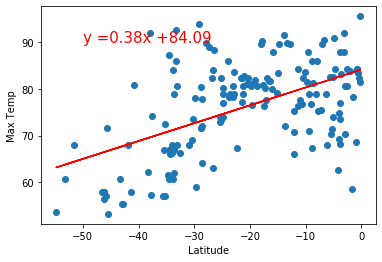

In [15]:
x_values = south_hemis_df["Lat"]
y_values = south_hemis_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",\
                       "Max Temp", (-50,90))

For every one unit increase in latitude, max temp will increase by 0.38 degrees
There is a positive relationship between latitude and max temp in the southern hemisphere
The r squared value indicates that only 52% of the variation in max temp is explained by latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3786456611086009


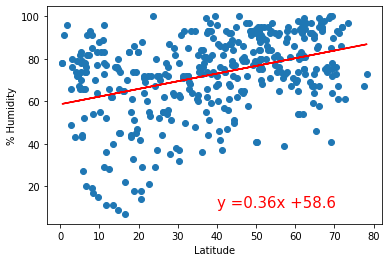

In [16]:
x_values = north_hemis_df["Lat"]
y_values = north_hemis_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity",\
                       "% Humidity", (40,10))

For every one unit increase in latitude, humidity will increase by 0.36%
There is a positive relationship between latitude and humidity in the northern hemisphere
The r squared value indicates that only 38% of the variation in humidity is explained by latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20629503782899583


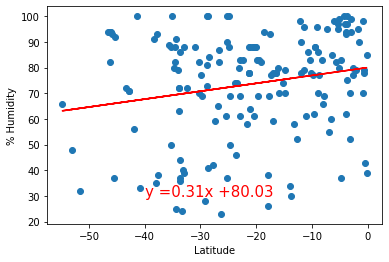

In [32]:
x_values = south_hemis_df["Lat"]
y_values = south_hemis_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity",\
                       "% Humidity", (-40,30))

For every one unit increase in latitude, humidity will increase by 0.31%
There is a positive relationship between latitude and humidity in the southern hemisphere
The r squared value indicates that only 21% of the variation in humidity is explained by latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2726368141111597


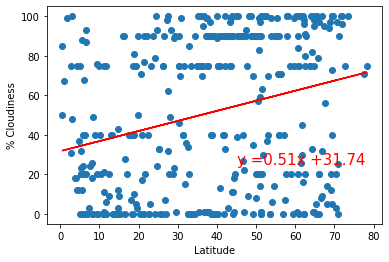

In [34]:
x_values = north_hemis_df["Lat"]
y_values = north_hemis_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness",\
                       "% Cloudiness", (45,25))

For every one unit increase in latitude, cloudiness will increase by 0.51%
There is a positive relationship between latitude and cloudiness in the northern hemisphere
The r squared value indicates that only 27% of the variation in cloudiness is explained by latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18025762767768705


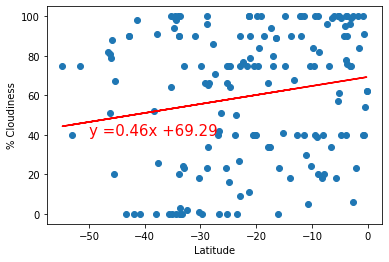

In [37]:
x_values = south_hemis_df["Lat"]
y_values = south_hemis_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness",\
                       "% Cloudiness", (-50,40))

For every one unit increase in latitude, cloudiness will increase by 0.46%
There is a positive relationship between latitude and cloudiness in the southern hemisphere
The r squared value indicates that only 18% of the variation in cloudiness is explained by latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014524578875594961


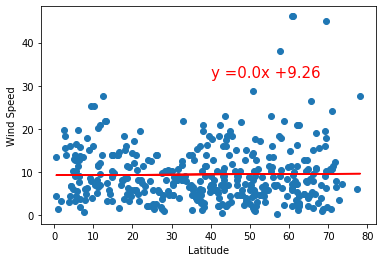

In [36]:
x_values = north_hemis_df["Lat"]
y_values = north_hemis_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed",\
                       "Wind Speed", (40,32))

There is no relationship between wind speed and latitude in the northern hemisphere
The r squared value indicates that only 1.5% of the variation in wind speed is explained by latitude, therefore latitude is not effective in predicting wind speed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1259725316366881


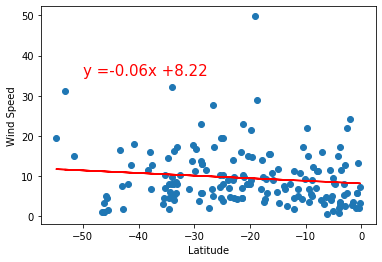

In [21]:
x_values = south_hemis_df["Lat"]
y_values = south_hemis_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed",\
                       "Wind Speed", (-50,35))

For every one unit increase in latitude, wind speed will decrease by 0.06 mph
There is a negative relationship between latitude and wind speed in the southern hemisphere
The r squared value indicates that only 13% of the variation in wind speed is explained by latitude